<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/ML_Model_Predict_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Dataset-Mental-Disorders.csv")
df

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [3]:
# lets see some information from this:
def info(df):

  # check total records:
  print(f"Total record is:{df.shape}\n")
  print(f"Total columns are:{df.shape[1]}\n")
  print(f"Column names are:\n{df.columns}\n")
  print("*"*170)

  # lets check the data types and null values:
  print("info\n")
  print(f"{df.info()}\n")
  print(f"Null Values:\n{df.isnull().sum()}\n")
  print("*"*170)

  # lets check the data is imbalanced or not:
  print(f"Checking the Output data is in proportion or not:\n{df['Expert Diagnose'].value_counts(normalize=True)*100}\n")
info(df)

Total record is:(120, 19)

Total columns are:19

Column names are:
Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')

**************************************************************************************************************************************************************************
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted       

In [4]:
# here we have spaces in columns lets fixed it and data is in proportion
# No need to balanced the data:
df.columns = df.columns.str.replace(" ","_")

In [5]:
df.columns

Index(['Patient_Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep_dissorder',
       'Mood_Swing', 'Suicidal_thoughts', 'Anorxia', 'Authority_Respect',
       'Try-Explanation', 'Aggressive_Response', 'Ignore_&_Move-On',
       'Nervous_Break-down', 'Admit_Mistakes', 'Overthinking',
       'Sexual_Activity', 'Concentration', 'Optimisim', 'Expert_Diagnose'],
      dtype='object')

### ***EDA***

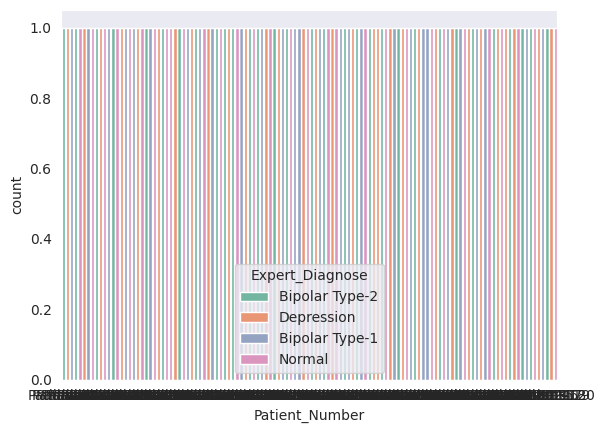

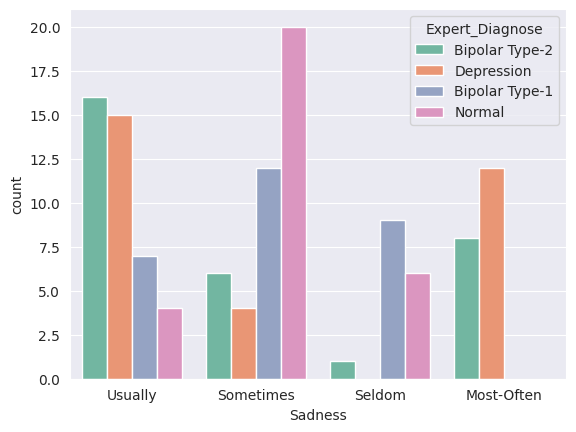

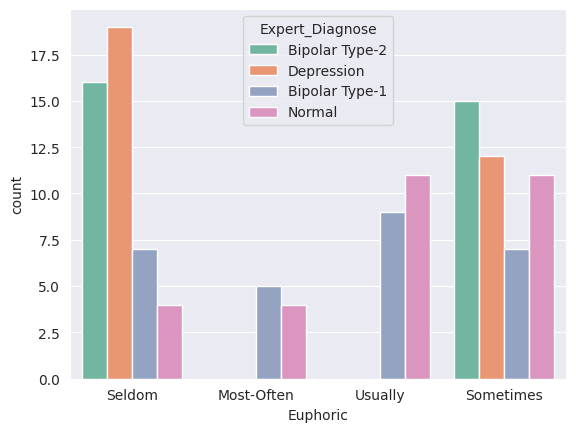

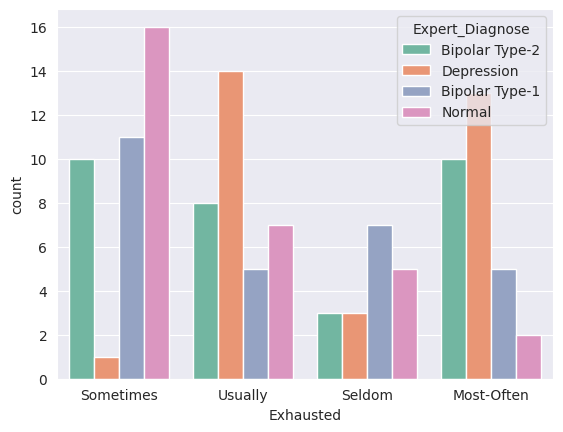

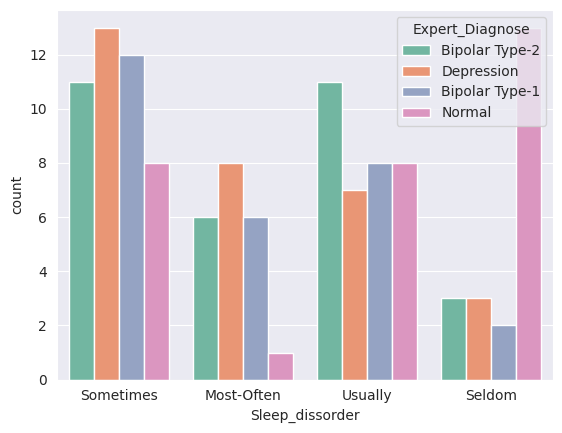

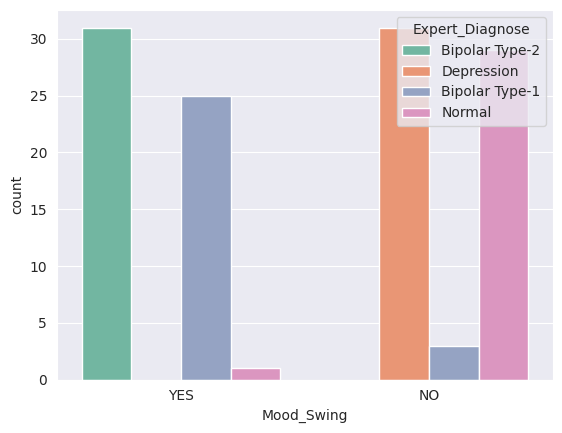

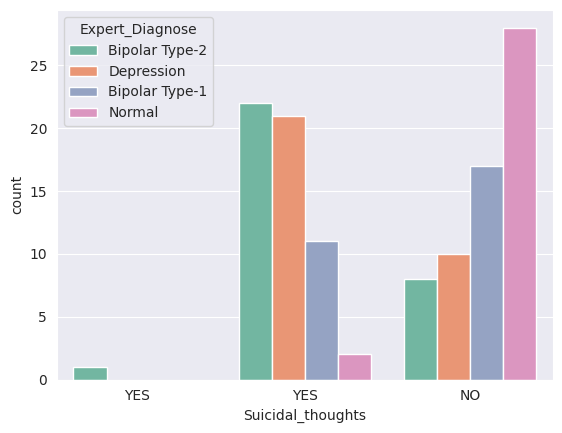

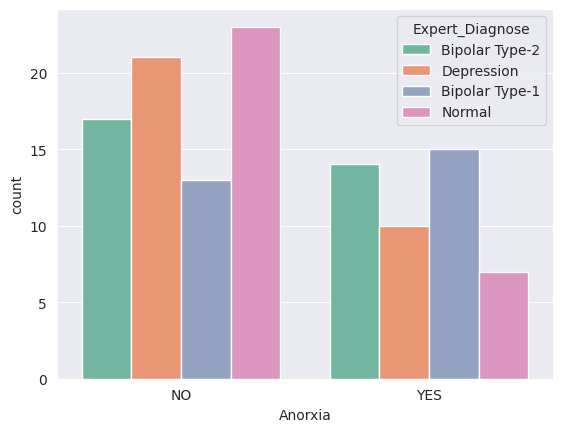

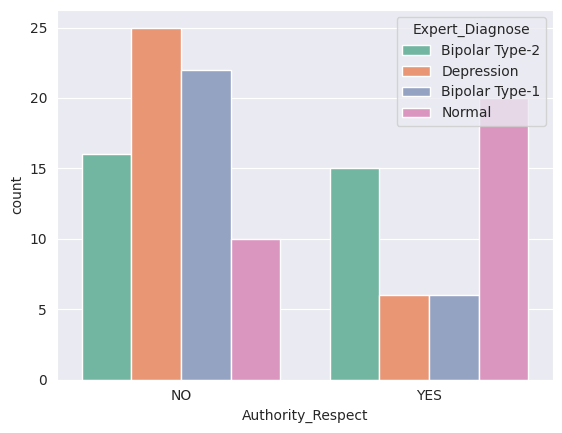

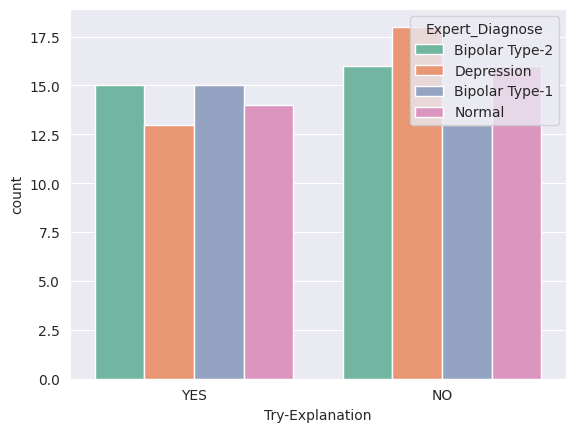

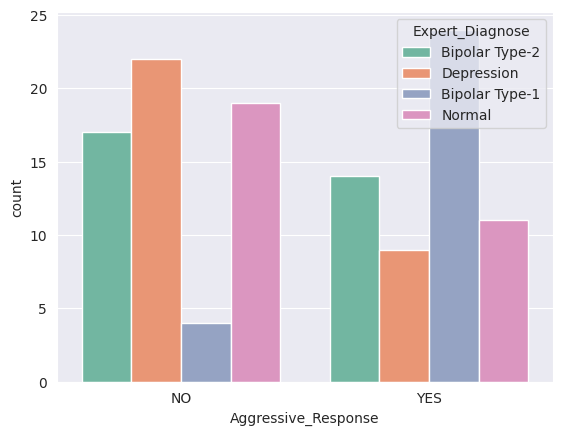

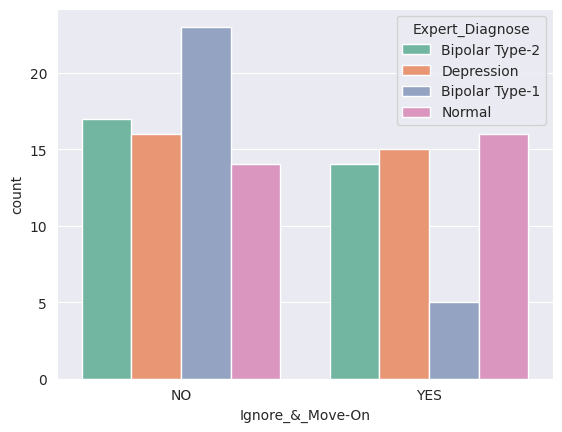

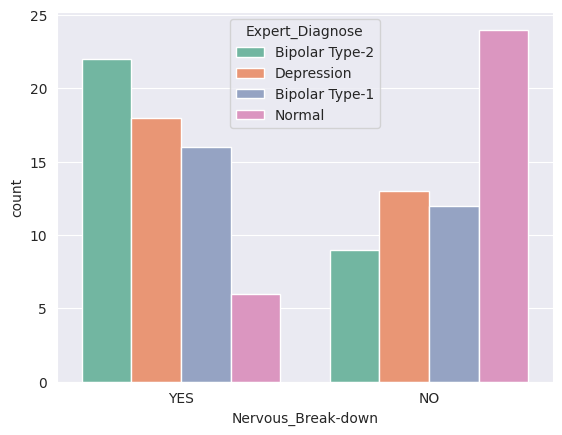

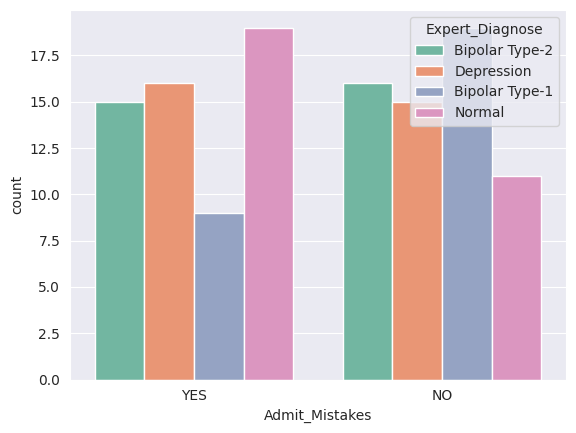

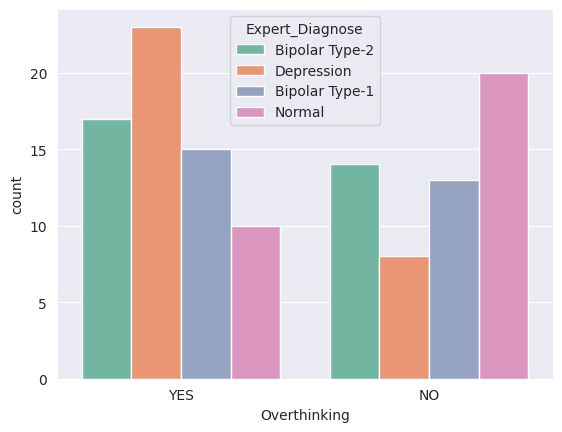

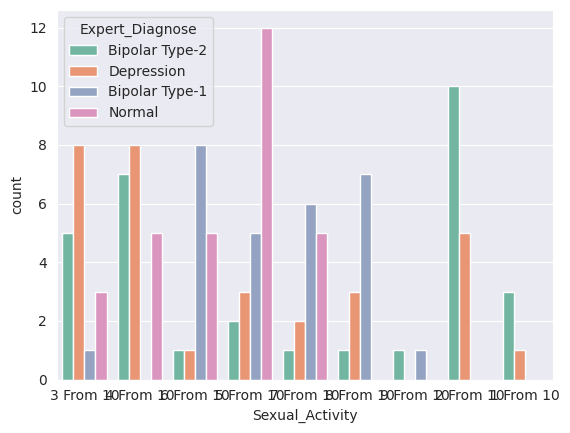

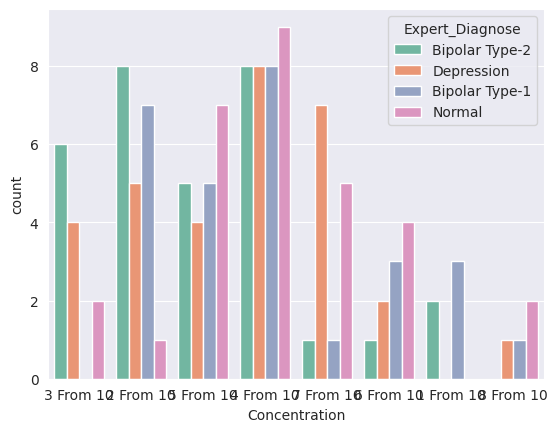

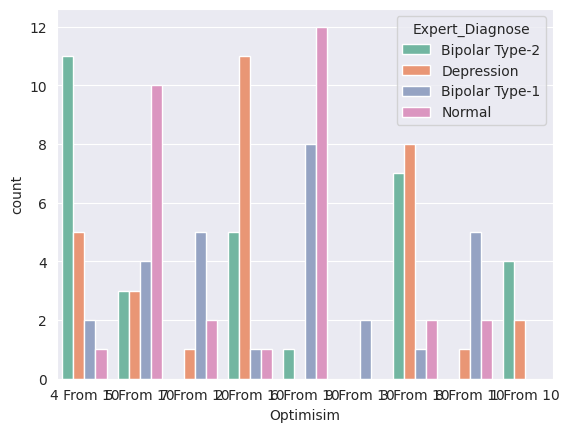

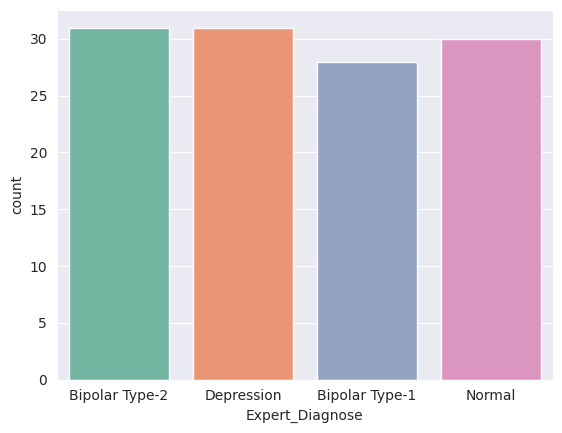

In [ ]:
for col in df.columns:
  sns.set_style("darkgrid")
  sns.set_palette("Set2")
  sns.countplot(data=df,x=col,hue="Expert_Diagnose")
  plt.show()

In [12]:
# lets see the paitent sadness according to Expert
data= pd.crosstab(df.Sadness,df.Expert_Diagnose)
data

Expert_Diagnose,Bipolar Type-1,Bipolar Type-2,Depression,Normal
Sadness,,,,
Most-Often,0,8,12,0
Seldom,9,1,0,6
Sometimes,12,6,4,20
Usually,7,16,15,4


Text(0.5, 1.0, 'Patient Sadness according to Expert Diagnose')

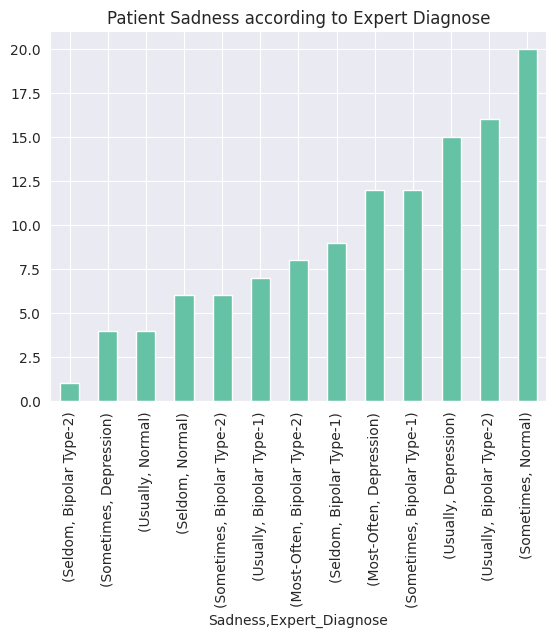

In [ ]:
df.groupby('Sadness')[['Expert_Diagnose']].value_counts().sort_values().plot.bar()
plt.title("Patient Sadness according to Expert Diagnose")

Text(0.5, 1.0, 'Suicidal Thoughts of Patients Yes vs No percentage Rate:')

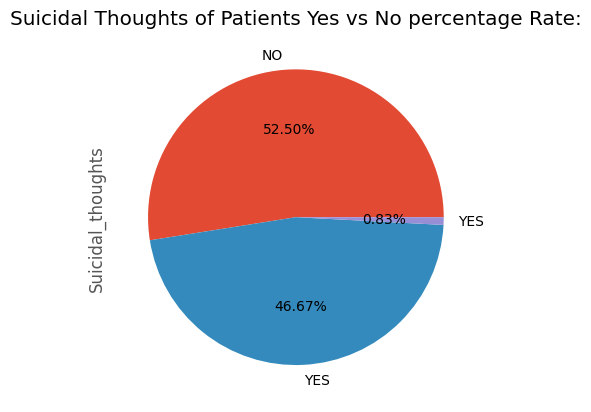

In [25]:
# sucidal thoughts percentage rate:
plt.style.use("ggplot")
df.Suicidal_thoughts.value_counts().plot.pie(autopct="%.2f%%")
plt.title("Suicidal Thoughts of Patients Yes vs No percentage Rate:")

     Exhausted Expert_Diagnose  Counts
0    Sometimes          Normal      16
1      Usually      Depression      14
2   Most-Often      Depression      13
3    Sometimes  Bipolar Type-1      11
4   Most-Often  Bipolar Type-2      10
5    Sometimes  Bipolar Type-2      10
6      Usually  Bipolar Type-2       8
7       Seldom  Bipolar Type-1       7
8      Usually          Normal       7
9   Most-Often  Bipolar Type-1       5
10      Seldom          Normal       5
11     Usually  Bipolar Type-1       5
12      Seldom  Bipolar Type-2       3
13      Seldom      Depression       3
14  Most-Often          Normal       2
15   Sometimes      Depression       1


Text(0.5, 1.0, 'Exhusetd Pateint Across Expert Diagnose\n')

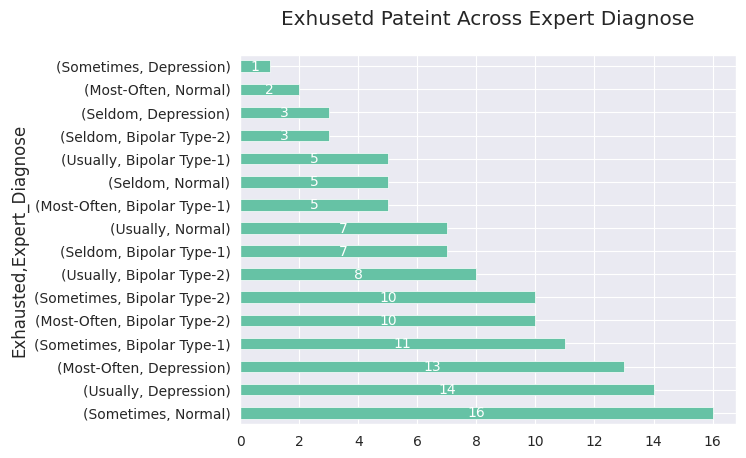

In [27]:
# lets see the Exhuatsed patients Rates over expet diagonse:
sns.set_style("darkgrid")
sns.set_palette("Set2")
print(df.groupby("Exhausted")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"))
bar = df.groupby("Exhausted")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Exhusetd Pateint Across Expert Diagnose\n")

  Authority_Respect Expert_Diagnose  Counts
0                NO      Depression      25
1                NO  Bipolar Type-1      22
2               YES          Normal      20
3                NO  Bipolar Type-2      16
4               YES  Bipolar Type-2      15
5                NO          Normal      10
6               YES  Bipolar Type-1       6
7               YES      Depression       6 



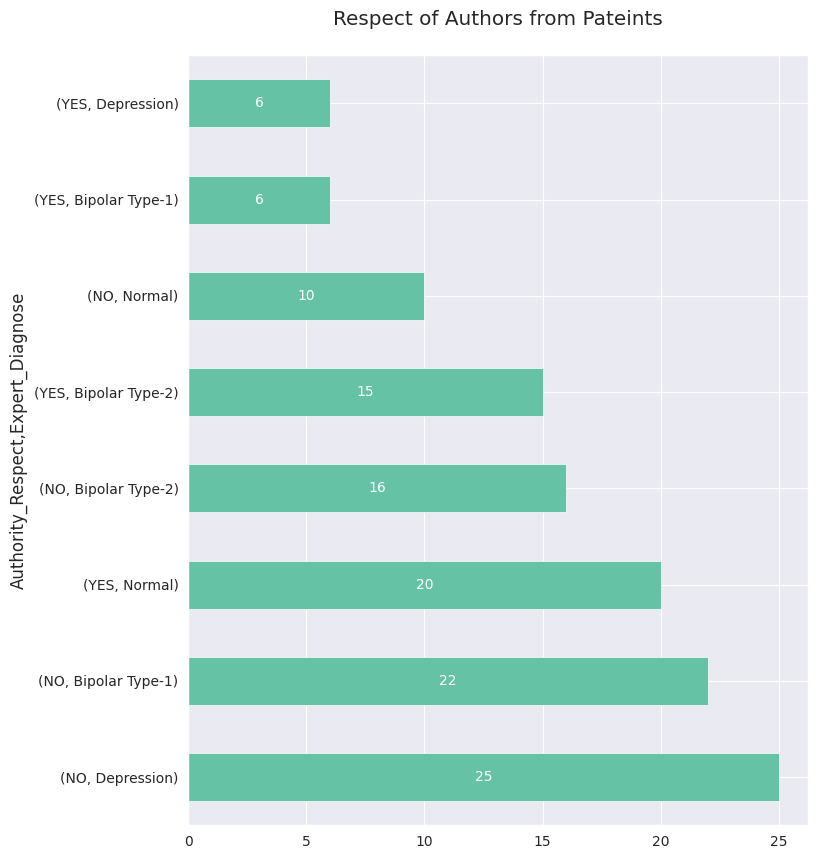

**************************************************************************************************************************************************************************
   Sleep_dissorder Expert_Diagnose  Counts
0           Seldom          Normal      13
1        Sometimes      Depression      13
2        Sometimes  Bipolar Type-1      12
3        Sometimes  Bipolar Type-2      11
4          Usually  Bipolar Type-2      11
5       Most-Often      Depression       8
6        Sometimes          Normal       8
7          Usually  Bipolar Type-1       8
8          Usually          Normal       8
9          Usually      Depression       7
10      Most-Often  Bipolar Type-1       6
11      Most-Often  Bipolar Type-2       6
12          Seldom  Bipolar Type-2       3
13          Seldom      Depression       3
14          Seldom  Bipolar Type-1       2
15      Most-Often          Normal       1 



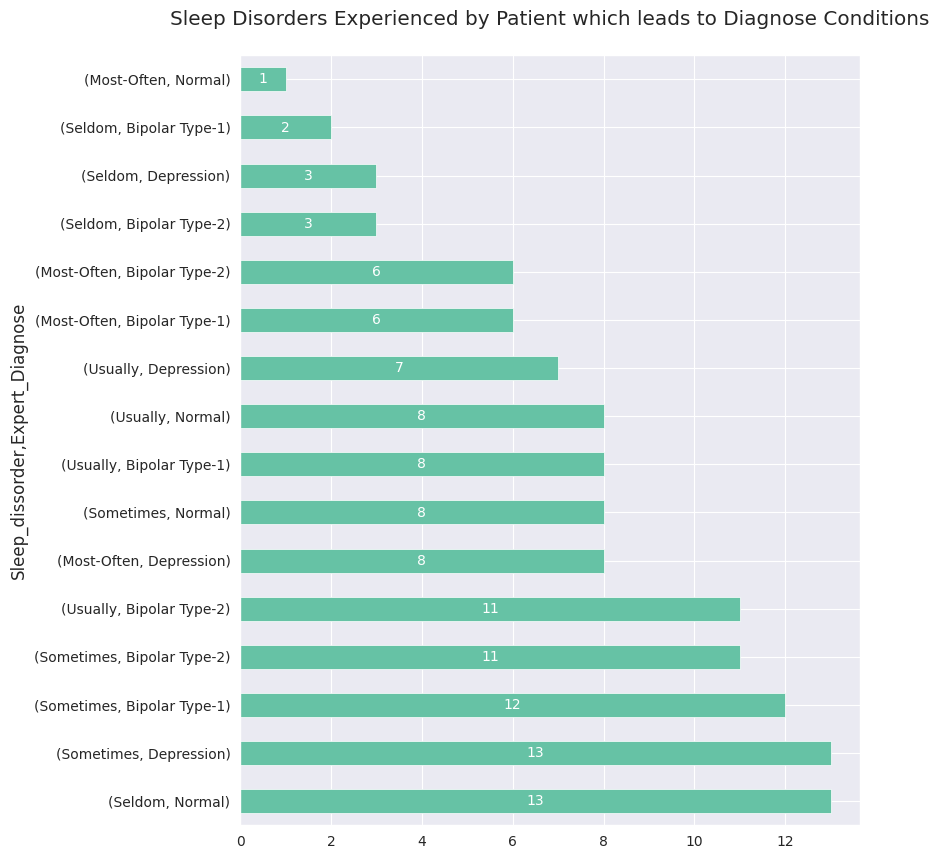

**************************************************************************************************************************************************************************
  Aggressive_Response Expert_Diagnose  Counts
0                 YES  Bipolar Type-1      24
1                  NO      Depression      22
2                  NO          Normal      19
3                  NO  Bipolar Type-2      17
4                 YES  Bipolar Type-2      14
5                 YES          Normal      11
6                 YES      Depression       9
7                  NO  Bipolar Type-1       4 



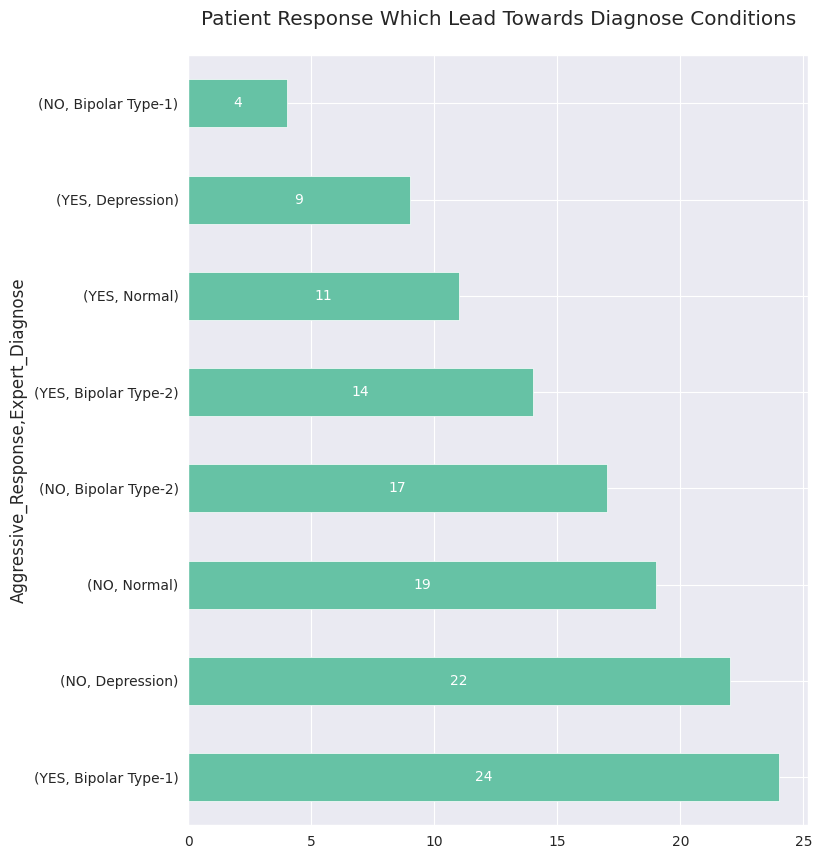

**************************************************************************************************************************************************************************
  Ignore_&_Move-On Expert_Diagnose  Counts
0               NO  Bipolar Type-1      23
1               NO  Bipolar Type-2      17
2               NO      Depression      16
3              YES          Normal      16
4              YES      Depression      15
5               NO          Normal      14
6              YES  Bipolar Type-2      14
7              YES  Bipolar Type-1       5 



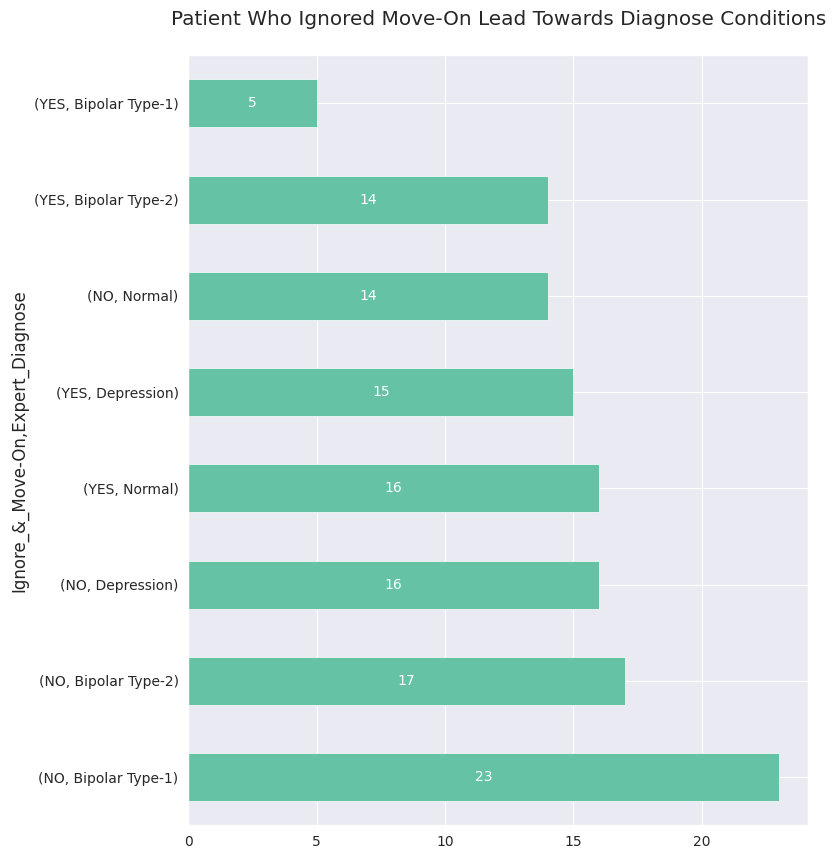

**************************************************************************************************************************************************************************
  Nervous_Break-down Expert_Diagnose  Counts
0                 NO          Normal      24
1                YES  Bipolar Type-2      22
2                YES      Depression      18
3                YES  Bipolar Type-1      16
4                 NO      Depression      13
5                 NO  Bipolar Type-1      12
6                 NO  Bipolar Type-2       9
7                YES          Normal       6 



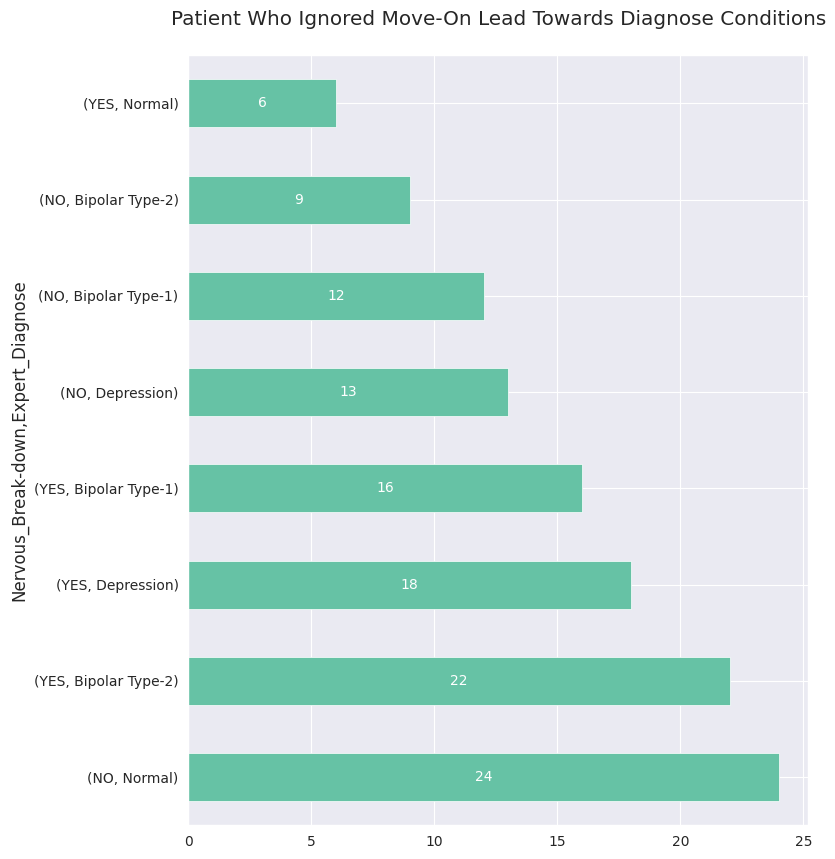

**************************************************************************************************************************************************************************
  Admit_Mistakes Expert_Diagnose  Counts
0             NO  Bipolar Type-1      19
1            YES          Normal      19
2             NO  Bipolar Type-2      16
3            YES      Depression      16
4             NO      Depression      15
5            YES  Bipolar Type-2      15
6             NO          Normal      11
7            YES  Bipolar Type-1       9 



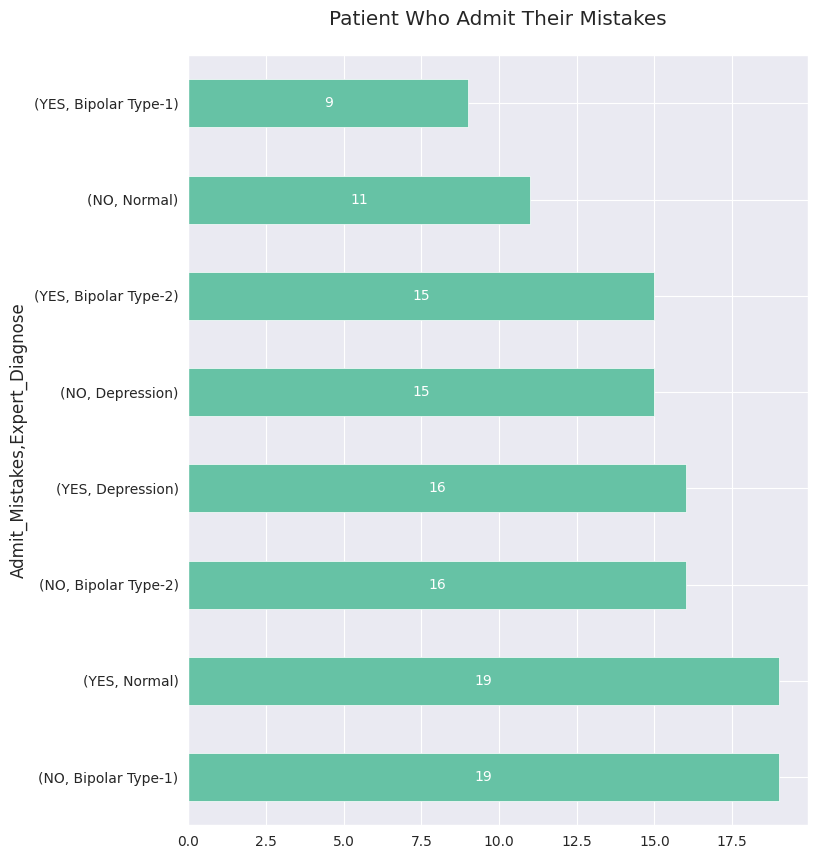

**************************************************************************************************************************************************************************
  Overthinking Expert_Diagnose  Counts
0          YES      Depression      23
1           NO          Normal      20
2          YES  Bipolar Type-2      17
3          YES  Bipolar Type-1      15
4           NO  Bipolar Type-2      14
5           NO  Bipolar Type-1      13
6          YES          Normal      10
7           NO      Depression       8 



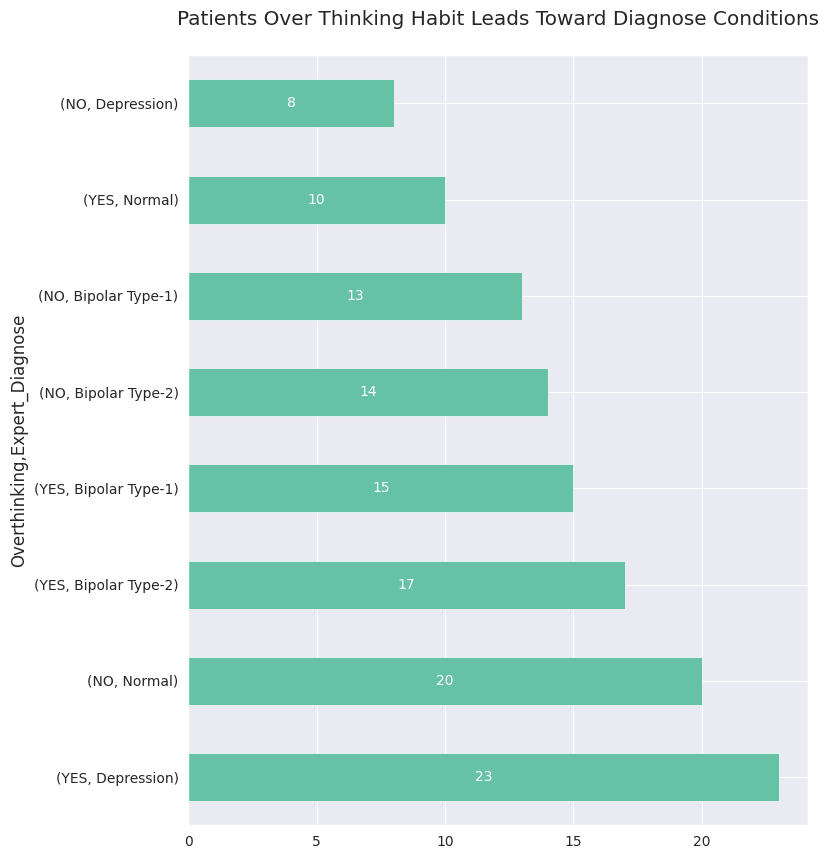

**************************************************************************************************************************************************************************
   Sexual_Activity Expert_Diagnose  Counts
0        5 From 10          Normal      12
1        2 From 10  Bipolar Type-2      10
2        3 From 10      Depression       8
3        6 From 10  Bipolar Type-1       8
4        4 From 10      Depression       8
5        4 From 10  Bipolar Type-2       7
6        8 From 10  Bipolar Type-1       7
7        7 From 10  Bipolar Type-1       6
8        6 From 10          Normal       5
9        5 From 10  Bipolar Type-1       5
10       7 From 10          Normal       5
11       4 From 10          Normal       5
12       3 From 10  Bipolar Type-2       5
13       2 From 10      Depression       5
14       8 From 10      Depression       3
15       5 From 10      Depression       3
16       3 From 10          Normal       3
17       1 From 10  Bipolar Type-2       3
18       7 F

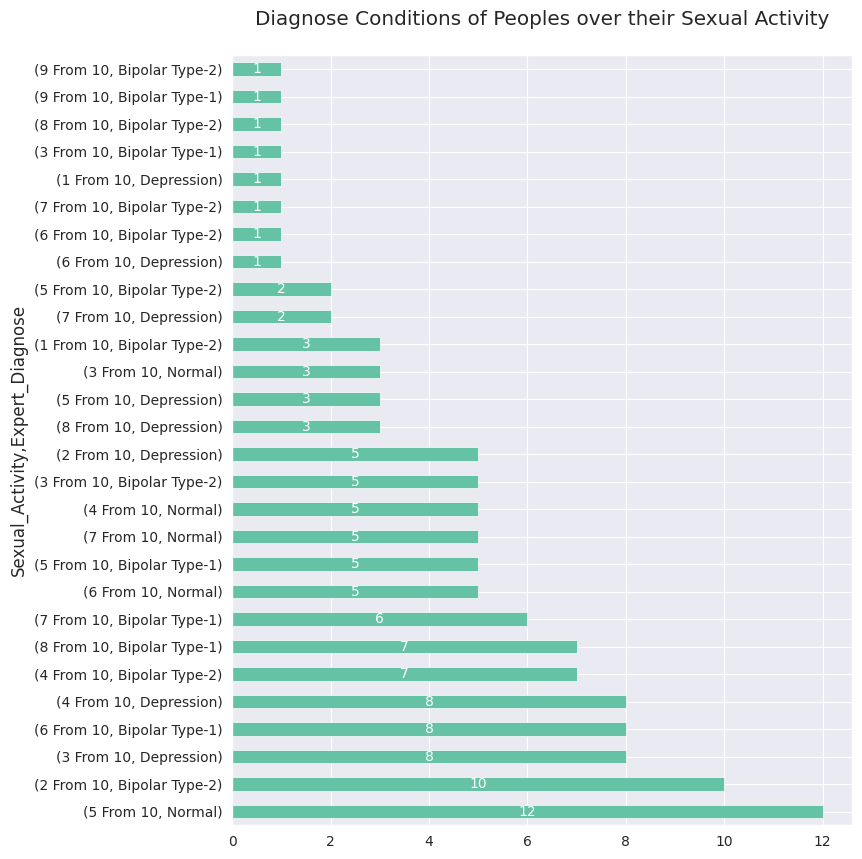

**************************************************************************************************************************************************************************
   Concentration Expert_Diagnose  Counts
0      4 From 10          Normal       9
1      4 From 10  Bipolar Type-1       8
2      2 From 10  Bipolar Type-2       8
3      4 From 10  Bipolar Type-2       8
4      4 From 10      Depression       8
5      7 From 10      Depression       7
6      2 From 10  Bipolar Type-1       7
7      5 From 10          Normal       7
8      3 From 10  Bipolar Type-2       6
9      5 From 10  Bipolar Type-2       5
10     5 From 10  Bipolar Type-1       5
11     7 From 10          Normal       5
12     2 From 10      Depression       5
13     6 From 10          Normal       4
14     3 From 10      Depression       4
15     5 From 10      Depression       4
16     6 From 10  Bipolar Type-1       3
17     1 From 10  Bipolar Type-1       3
18     1 From 10  Bipolar Type-2       2
19     6 

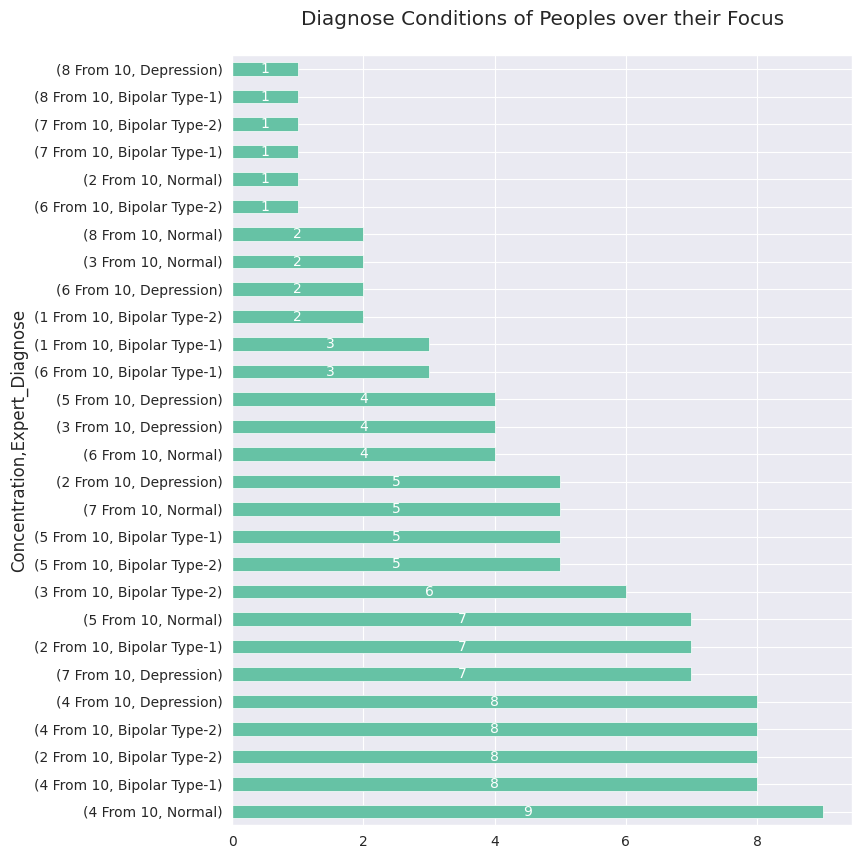

**************************************************************************************************************************************************************************
    Optimisim Expert_Diagnose  Counts
0   6 From 10          Normal      12
1   2 From 10      Depression      11
2   4 From 10  Bipolar Type-2      11
3   5 From 10          Normal      10
4   3 From 10      Depression       8
5   6 From 10  Bipolar Type-1       8
6   3 From 10  Bipolar Type-2       7
7   2 From 10  Bipolar Type-2       5
8   8 From 10  Bipolar Type-1       5
9   7 From 10  Bipolar Type-1       5
10  4 From 10      Depression       5
11  5 From 10  Bipolar Type-1       4
12  1 From 10  Bipolar Type-2       4
13  5 From 10  Bipolar Type-2       3
14  5 From 10      Depression       3
15  1 From 10      Depression       2
16  4 From 10  Bipolar Type-1       2
17  3 From 10          Normal       2
18  7 From 10          Normal       2
19  8 From 10          Normal       2
20  9 From 10  Bipolar Type-1  

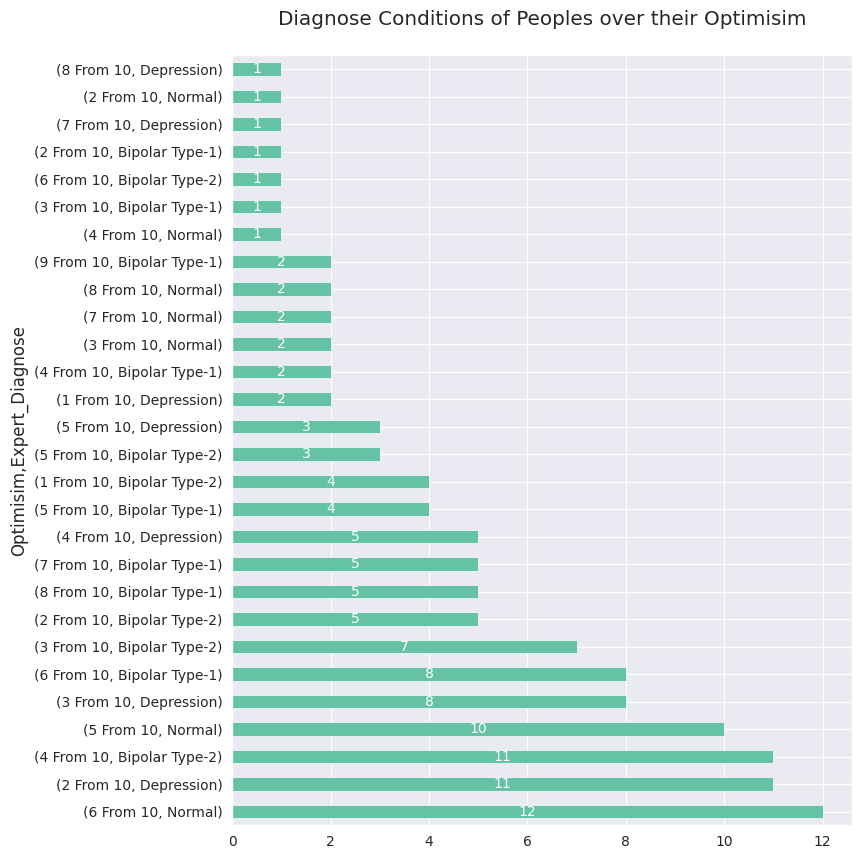

In [36]:
# Patients who repect their Authors
plt.figure(figsize=(8,10))
print(df.groupby("Authority_Respect")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Authority_Respect")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Respect of Authors from Pateints\n")
plt.show()
print("*"*170)

# Patients with their sleep disorder
plt.figure(figsize=(8,10))
print(df.groupby("Sleep_dissorder")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Sleep_dissorder")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Sleep Disorders Experienced by Patient which leads to Diagnose Conditions\n")
plt.show()
print("*"*170)

# Aggressive response of people would be consider diagnose conditions
plt.figure(figsize=(8,10))
print(df.groupby("Aggressive_Response")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Aggressive_Response")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patient Response Which Lead Towards Diagnose Conditions\n")
plt.show()
print("*"*170)

#
plt.figure(figsize=(8,10))
print(df.groupby("Ignore_&_Move-On")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Ignore_&_Move-On")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patient Who Ignored Move-On Lead Towards Diagnose Conditions\n")
plt.show()
print("*"*170)

# pateints who nervouse and break down and adds on towrds Diagnose Conditions
plt.figure(figsize=(8,10))
print(df.groupby("Nervous_Break-down")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Nervous_Break-down")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patient Who Ignored Move-On Lead Towards Diagnose Conditions\n")
plt.show()
print("*"*170)

# patients who admit their mistakes:
plt.figure(figsize=(8,10))
print(df.groupby("Admit_Mistakes")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Admit_Mistakes")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patient Who Admit Their Mistakes\n")
plt.show()
print("*"*170)

# Overthinking Patients which leads towards Expert Diagnose:
plt.figure(figsize=(8,10))
print(df.groupby("Overthinking")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Overthinking")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patients Over Thinking Habit Leads Toward Diagnose Conditions\n")
plt.show()
print("*"*170)

# Diagnose Conditions of Patients Across sexual activity
plt.figure(figsize=(8,10))
print(df.groupby("Sexual_Activity")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Sexual_Activity")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Diagnose Conditions of Peoples over their Sexual Activity\n")
plt.show()
print("*"*170)

# Pateints Ability to Cocentrate ,Focus:
plt.figure(figsize=(8,10))
print(df.groupby("Concentration")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Concentration")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Diagnose Conditions of Peoples over their Focus\n")
plt.show()
print("*"*170)

# patients attitude in real world
plt.figure(figsize=(8,10))
print(df.groupby("Optimisim")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Optimisim")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Diagnose Conditions of Peoples over their Optimisim\n")
plt.show()

In [37]:
# we have to check the data type is nominal catgeorical or Ordinal categorical type:
# Where ever we have yes and No means no any numerical value greater or smaller relation --> Nominal Categorica Type:
# Where ever we get some relation in input catgeorical data --> ordinal categorical data:
# lets import the libraries to convert categorical data into numerical data:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [38]:
Ord = OrdinalEncoder()

In [41]:
# converting Ordinal categorical Data
for col in [['Sadness','Euphoric','Exhausted','Sleep_dissorder','Sexual_Activity','Concentration','Optimisim']]:
  df[col] = Ord.fit_transform(df[col])

In [43]:
# converting Nominal Catgeorical data:
encode = LabelEncoder()

In [46]:
for i in ['Mood_Swing','Suicidal_thoughts','Anorxia','Authority_Respect','Try-Explanation','Aggressive_Response','Ignore_&_Move-On','Nervous_Break-down','Admit_Mistakes','Overthinking','Expert_Diagnose']:
  df[i] = encode.fit_transform(df[i])

### ***we are getting the values within range 1-5 and some values witjin range 5-10 so no need to do standardization:***

In [60]:
X = df.drop(columns=['Expert_Diagnose','Patient_Number'])
y = df['Expert_Diagnose']

In [51]:
# lets import libararies to build the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [61]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs")

### ***Multi_Class: Used when we have more than 2 categorie in Otput Data***
### ***Solver basically used to optimize the best paramteres or features to reduce the error* between actual and predicted value**

In [62]:
# lets spli the data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((84, 17), (36, 17))

In [63]:
# training:
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [64]:
# test:
y_pred = model.predict(x_test)
y_pred

array([2, 3, 3, 2, 2, 2, 0, 3, 2, 2, 2, 0, 0, 0, 3, 1, 2, 1, 3, 1, 2, 1,
       2, 2, 3, 0, 0, 3, 0, 3, 1, 3, 3, 0, 3, 3])

In [65]:
# Actual data:
y_test.values

array([2, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 3, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 3, 1, 0, 3, 2, 3, 1, 3, 3, 0, 0, 3])

### ***Performance Measures***

In [66]:
accuracy_score(y_test,y_pred)*100

75.0

In [67]:
# lets do the standardiztaion:
from sklearn.preprocessing import StandardScaler

In [68]:
scaled = StandardScaler()

x_train_scaled = scaled.fit_transform(x_train)
x_test_scaled = scaled.fit_transform(x_test)

In [69]:
model.fit(x_train_scaled,y_train)

LogisticRegression(multi_class='multinomial')

In [70]:
# test:
y1_pred = model.predict(x_test_scaled)
y1_pred

array([2, 1, 2, 2, 2, 2, 0, 3, 2, 2, 2, 0, 0, 0, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 3, 0, 0, 3, 0, 3, 1, 3, 3, 0, 3, 3])

In [71]:
accuracy_score(y_test,y1_pred)*100

75.0

### ***No any impact after using stadardization beacuse values are not in gearter range***

In [74]:
df.Expert_Diagnose.value_counts()
# Bipolar Type-2 --> 1
# Depression     --> 2
# Normal         --> 3
# Bipolar Type-1 --> 0

1    31
2    31
3    30
0    28
Name: Expert_Diagnose, dtype: int64

In [72]:
# lets see the cnfusion matrix:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[5, 0, 0, 2],
       [1, 5, 0, 1],
       [1, 0, 8, 0],
       [1, 0, 3, 9]])

Bipolar Type-2 --> 1, Depression     --> 2, Normal         --> 3, Bipolar Type-1 --> 0


<Axes: >

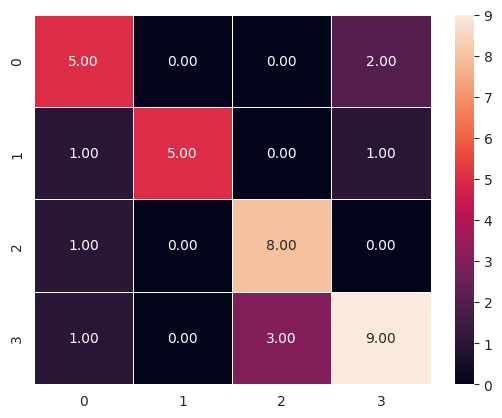

In [75]:
# lets implement con matrix in heatmap:
print("Bipolar Type-2 --> 1, Depression     --> 2, Normal         --> 3, Bipolar Type-1 --> 0")
sns.heatmap(data=con_mat,annot=True,fmt=".2f",linewidth=0.6)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       1.00      0.71      0.83         7
           2       0.73      0.89      0.80         9
           3       0.75      0.69      0.72        13

    accuracy                           0.75        36
   macro avg       0.78      0.75      0.75        36
weighted avg       0.77      0.75      0.75        36



In [78]:
# precision : accuracy of positive prediction done by the model by catching the false positives:
precision_score(y_test,y_pred,average='macro')*100
# if we have multiple classes then we ahve to use average beacuse it gives error when we dirctly use without avergae beause we have  multiple calsses
# average summerized the whole classes and gives model accuracy over multple classes

77.55681818181819

In [80]:
# recall: aacuracy of postive prediction done by the model by catching the false negatives:
recall_score(y_test,y_pred,average="macro")*100

75.24420024420024

<Axes: >

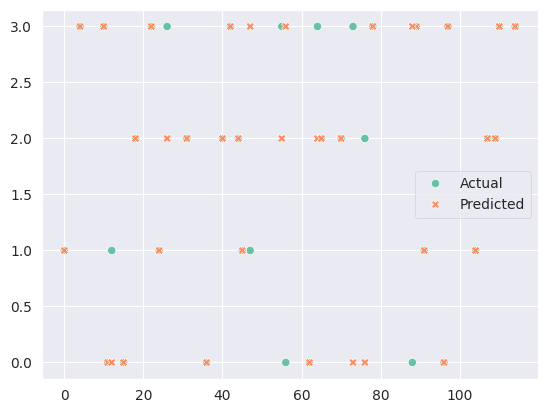

In [81]:
# lets plot the actual vs predicted values :
ndf = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
sns.scatterplot(data=ndf)

### ***lets see how Decision Tree Classifier works on Multiple Class:***

In [82]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [83]:
# train:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
# test:
y2_pred = clf.predict(x_test)
y2_pred

array([2, 0, 3, 2, 2, 0, 3, 3, 2, 0, 2, 0, 0, 0, 3, 1, 2, 1, 3, 1, 2, 1,
       2, 2, 0, 1, 0, 3, 3, 3, 1, 3, 3, 0, 0, 3])

In [85]:
y_test.values

array([2, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 3, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 3, 1, 0, 3, 2, 3, 1, 3, 3, 0, 0, 3])

In [87]:
# performance meausre:
accuracy_score(y_test,y2_pred)*100

77.77777777777779

In [88]:
clf.classes_

array([0, 1, 2, 3])

### ***As comapaire to the Logsitic Reg and Decision Tree model performance better in both but quite greater performance done by Decision Tree Classifier***

In [100]:
class_name = [str(i) for i in y_train.unique()]
class_name

['0', '2', '3', '1']

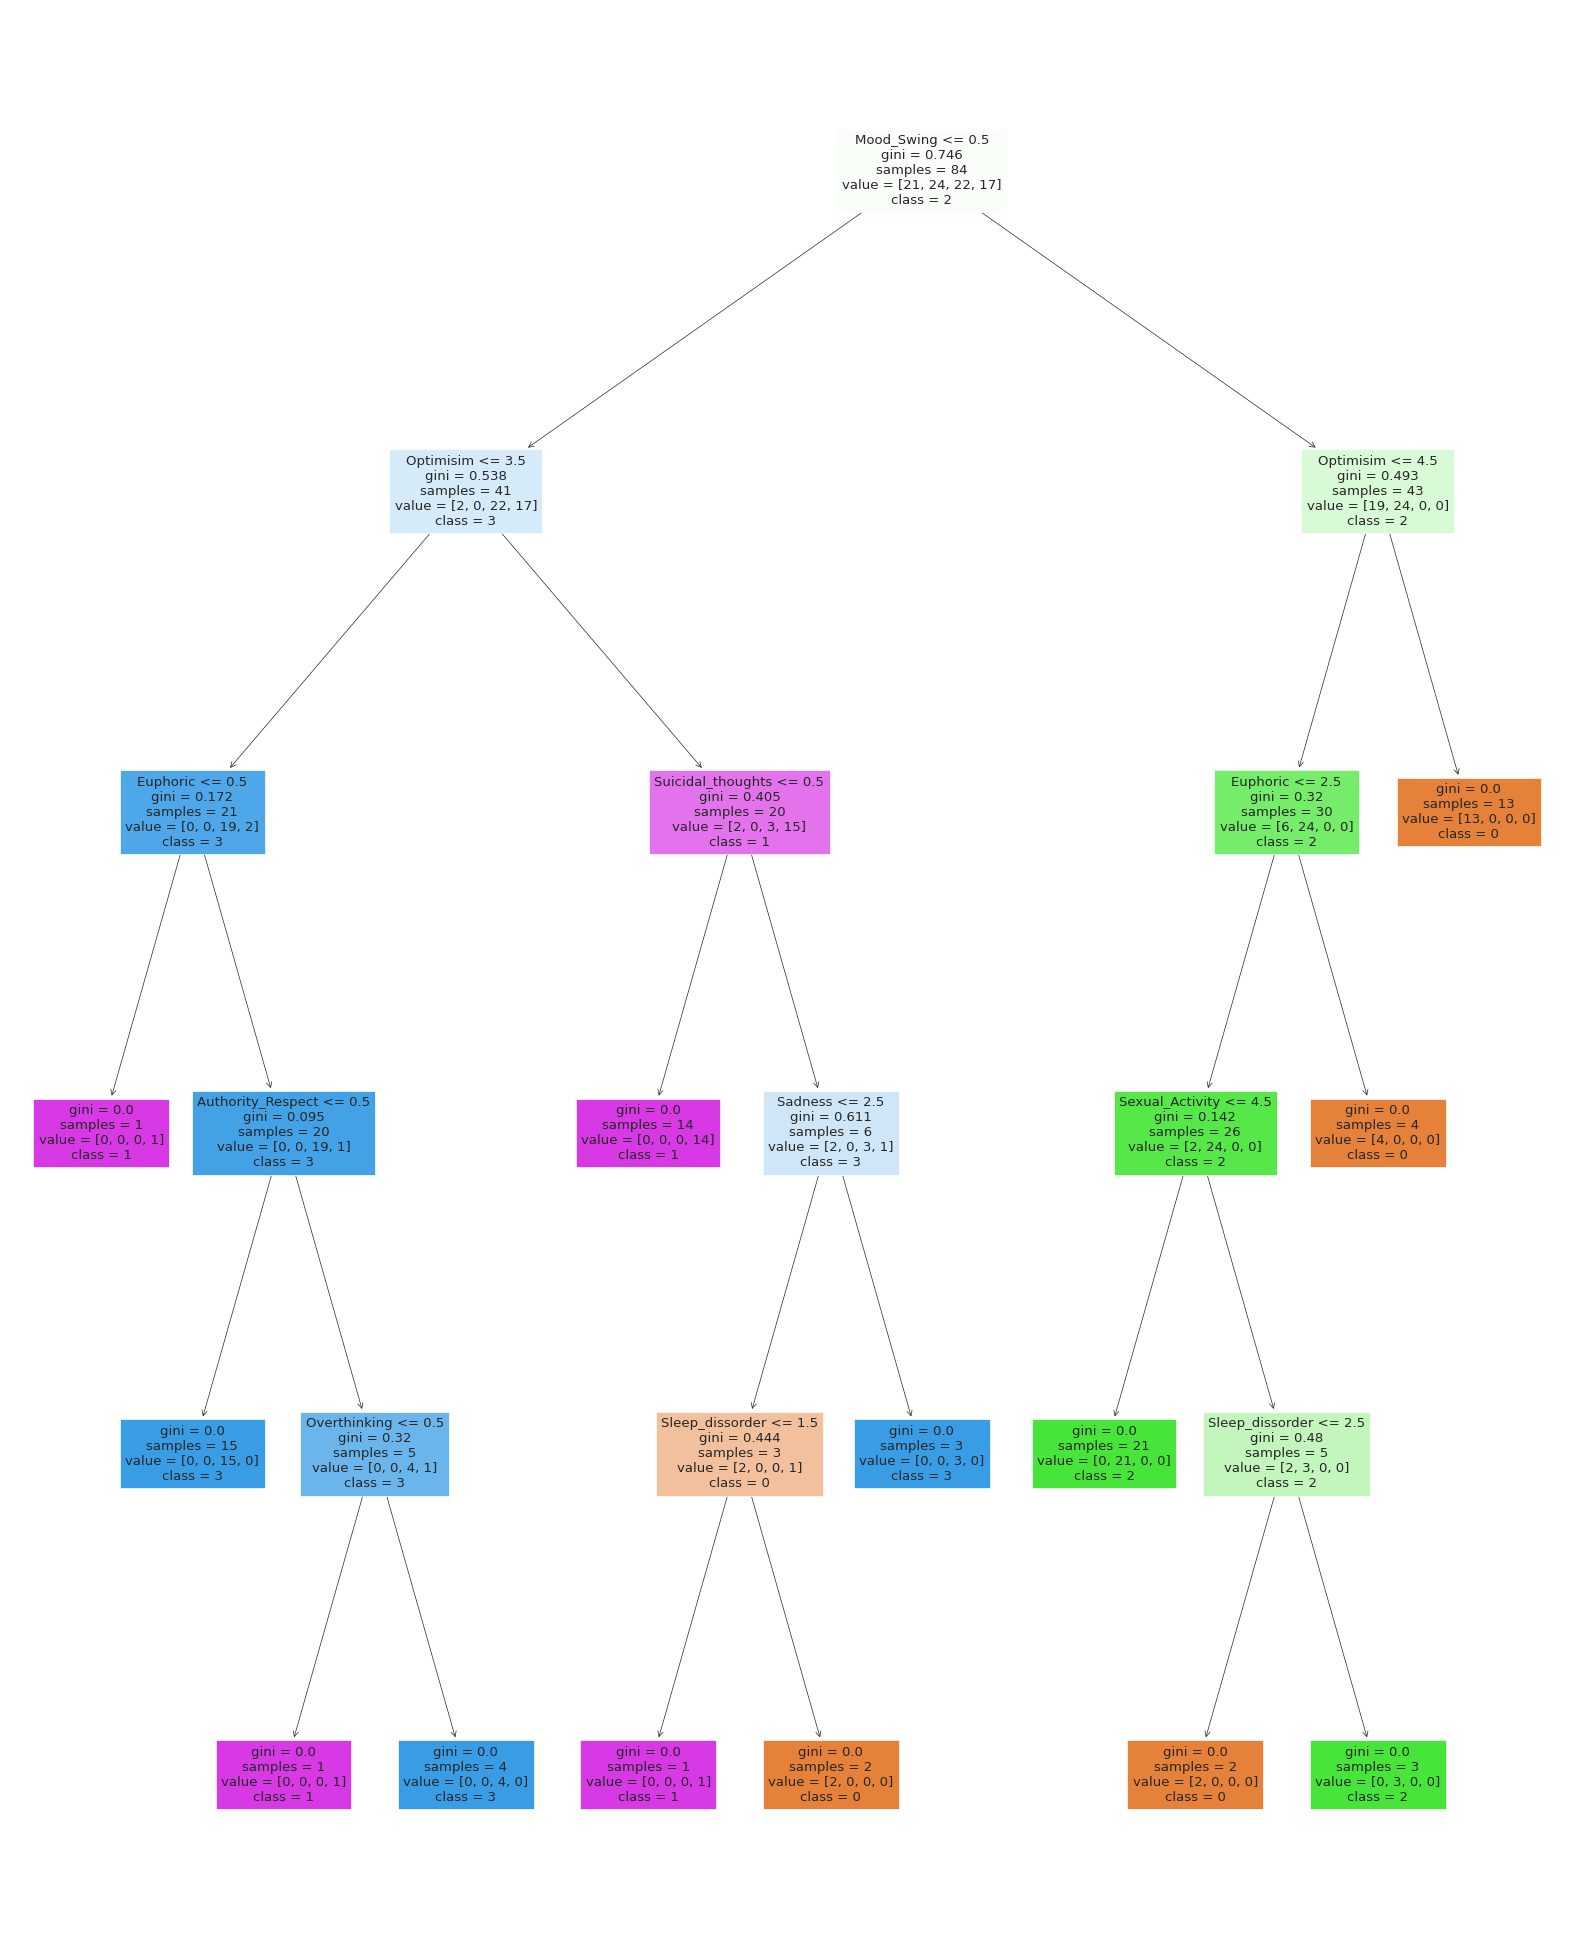

In [101]:
# lets plot the decision tree :
plt.figure(figsize=(20,25))
tree.plot_tree(clf,feature_names=x_train.columns,class_names=class_name,filled=True)
plt.show()

# Bipolar Type-2 --> 1
# Depression     --> 2
# Normal         --> 3
# Bipolar Type-1 --> 0